# Imports and load data

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Preprocessing

In [3]:
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i in range (len (sequences)):
    for j in range (len (sequences [i])):
      results [i] [sequences [i] [j]] = 1.
  return results

In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## Convert labels from integer to numeric

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# View some reviews

In [7]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [15]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Define the network

In [16]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [18]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Define a validation set

In [19]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

# Train with a validation set

In [20]:
model.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit (partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 75ms/step - loss: 0.5226 - acc: 0.7819 - val_loss: 0.4331 - val_acc: 0.8276
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3240 - acc: 0.8983 - val_loss: 0.3334 - val_acc: 0.8705
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2376 - acc: 0.9233 - val_loss: 0.2859 - val_acc: 0.8871
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1837 - acc: 0.9411 - val_loss: 0.2782 - val_acc: 0.8895
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1508 - acc: 0.9512 - val_loss: 0.2759 - val_acc: 0.8883
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1235 - acc: 0.9631 - val_loss: 0.2874 - val_acc: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1021 - acc: 0.9683 - val_loss: 0.3206 - val_acc: 0.8812
Epoch 8/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0851 - a

# Visualize the training loss

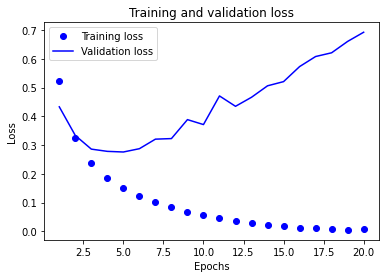

In [22]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualize the training accuracy

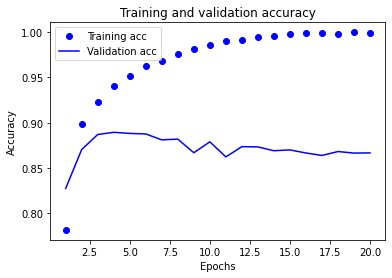

In [23]:
plt.clf() #Clears the figure
acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Add L2 regularization and compare with previous model

In [25]:
from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile (optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history_l2 = model.fit (partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 61ms/step - loss: 0.5598 - acc: 0.7855 - val_loss: 0.4346 - val_acc: 0.8704
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.3614 - acc: 0.9018 - val_loss: 0.3642 - val_acc: 0.8826
Epoch 3/20
30/30 [==============================] - 1s 44ms/step - loss: 0.2916 - acc: 0.9191 - val_loss: 0.3347 - val_acc: 0.8867
Epoch 4/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2519 - acc: 0.9329 - val_loss: 0.3282 - val_acc: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2307 - acc: 0.9414 - val_loss: 0.3283 - val_acc: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2147 - acc: 0.9467 - val_loss: 0.3335 - val_acc: 0.8856
Epoch 7/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2039 - acc: 0.9519 - val_loss: 0.3492 - val_acc: 0.8836
Epoch 8/20
30/30 [==============================] - 1s 41ms/step - loss: 0.1954 - a

# Loss comparison

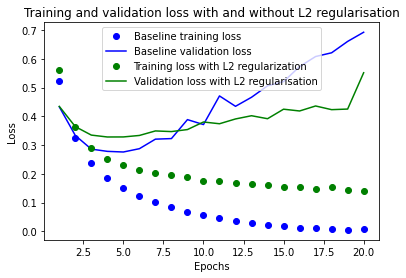

In [26]:
history_dict = history.history
baseline_train = history_dict['loss']
baseline_val = history_dict['val_loss']
reg_history_dict = history_l2.history
l2_train = reg_history_dict['loss']
l2_val = reg_history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, baseline_train, 'bo', label='Baseline training loss') 
plt.plot(epochs, baseline_val, 'b', label='Baseline validation loss')
plt.plot(epochs, l2_train, 'go', label='Training loss with L2 regularization') 
plt.plot(epochs, l2_val, 'g', label='Validation loss with L2 regularisation')
plt.title('Training and validation loss with and without L2 regularisation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Droput
Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto.  
Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training.  
Let’s say a given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1] .
The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5.
At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.